# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [1]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [2]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [3]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [76]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_count])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

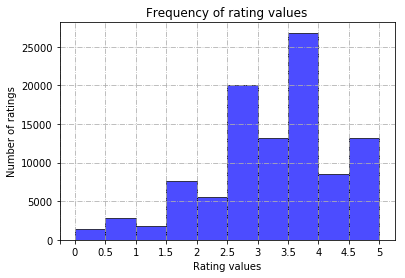

In [85]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken inany way. A monotonically decreasing curve instead of ahistogram is expected.